# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats# Import all required libraries
import plotly.express as px
#from pandas_summary import DataFrameSummary

loading tools that are needed to process data

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [3]:
df = pd.read_csv('/datasets/games.csv')





In [4]:
#dtale.show(df)

loaded datasets to processed

In [5]:
#Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


loaded df info to observe information 16715 rows, 11 columns, 0 no missing values, 2 data types float64 and objects

In [6]:
df.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

observe pysical appearance of data for NAN values , doplicates and other inconsistencies

In [7]:
df.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

filtered dataframe using info , head and describe to obtain information for further processing

In [8]:
df.duplicated().sum()# Check for duplicate entries


0

also checked for duplicated info

### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

total number of records in dataset is 16715
datatypes in columns are float64 and objects
althought they are not obvious but they are there such as NAN and ill placed data types
otherthan that which has already been mentioned no

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [9]:
df.columns = df.columns.str.lower()# Convert column names to lowercase

I converted column headers to lowercase

In [10]:
df.head()# Verify the changes

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

checked result

### 2.2 Data Type Conversion

In [11]:
df.dtypes# Check current data types

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

used to observe data types for each column

revealing the same info from earlier

types are floats and objects

In [12]:
 df['year_of_release'].dtype

dtype('float64')

In [13]:
df[['year_of_release']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  16446 non-null  float64
dtypes: float64(1)
memory usage: 130.7 KB


done to calculate missing values

In [14]:
print(f"Rows with missing year_of_release: {df['year_of_release'].isna().sum()}")

Rows with missing year_of_release: 269


In [15]:
df =  df.dropna(subset=['year_of_release'])
df['year_of_release'].isna().sum()

0

In [16]:
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16446 rows x 11 columns]

In [17]:
#df.loc[df['year_of_release'].isna(),'year_of_release']=df.groupby('platform')['year_of_release'].transform("median")


used to fill missing values inorder to covert

In [18]:
df[['year_of_release']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  16446 non-null  float64
dtypes: float64(1)
memory usage: 257.0 KB


to check if missing values where filled

In [19]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16446, dtype: int64

convert to int and dislpay results

In [20]:
df[['user_score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_score  9839 non-null   object
dtypes: object(1)
memory usage: 257.0+ KB


checking for missing values !!!very deceptive!!!

#df['user_score'] = df['user_score'].astype('float32')
#df['user_score']   this caused an Error expossing TBD

In [21]:
tbd_counts = (df == "tbd").sum()
print(tbd_counts)

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         2376
rating                0
dtype: int64


In [22]:

print(df['user_score'].isna().sum())

6607


due to earlier observation I find this misleading

In [23]:
mask = df['user_score'] == 'tbd'
tbd_rows = df[mask]
tbd_rows

name platform  year_of_release       genre  \
119                     Zumba Fitness      Wii             2010      Sports   
301    Namco Museum: 50th Anniversary      PS2             2005        Misc   
520                   Zumba Fitness 2      Wii             2011      Sports   
645                      uDraw Studio      Wii             2010        Misc   
718                   Just Dance Kids      Wii             2010        Misc   
...                               ...      ...              ...         ...   
16695                 Planet Monsters      GBA             2001      Action   
16697                Bust-A-Move 3000       GC             2003      Puzzle   
16698                Mega Brain Boost       DS             2008      Puzzle   
16704                        Plushees       DS             2008  Simulation   
16706   Men in Black II: Alien Escape       GC             2003     Shooter   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
119        3.45      2.59       0.0         0.66           NaN        tbd   
301        2.08      1.35       0.0         0.54          61.0        tbd   
520        1.51      1.03       0.0         0.27           NaN        tbd   
645        1.65      0.57       0.0         0.20          71.0        tbd   
718        1.52      0.54       0.0         0.18           NaN        tbd   
...         ...       ...       ...          ...           ...        ...   
16695      0.01      0.00       0.0         0.00          67.0        tbd   
16697      0.01      0.00       0.0         0.00          53.0        tbd   
16698      0.01      0.00       0.0         0.00          48.0        tbd   
16704      0.01      0.00       0.0         0.00           NaN        tbd   
16706      0.01      0.00       0.0         0.00           NaN        tbd   

      rating  
119        E  
301     E10+  
520        T  
645        E  
718        E  
...      ...  
16695      E  
16697      E  
16698      E  
16704      E  
16706      T  

[2376 rows x 11 columns]

used mask to observe TBD locations

In [24]:
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

used head to observe NAN value locations

In [25]:
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'])
#df['user_score'] = df['user_score'].fillna(df['user_score'].mean())
#df['user_score'] = df['user_score'].fillna(df['user_score'].median()) suggested but not up to the standard of my interpertation
#df['user_score'] = df['user_score'].fillna(0) suggested also suggested but not up to the standard of my interpertatio

used replace, pd.NA,pd.to_numeric and fillna to convert tbd

In [26]:
tbd_counts = (df == "TBD").sum()
print(tbd_counts)


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


realease_year sucessfully conveted from float to int and user_score nolonger missing values after process of converting tbd to mean of user_score

In [27]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.

In [28]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

### 2.3 Handling Missing Values

In [29]:
df# Examine missing values

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16446 rows x 11 columns]

In [30]:
missing_percentage_per_column = (df.isna().sum() / len(df)) * 100
missing_percentage_per_column# Calculate percentage of missing values

name                0.012161
platform            0.000000
year_of_release     0.000000
genre               0.012161
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.459321
user_score         54.621184
rating             40.605618
dtype: float64

I used missing_percentage_per_column at this time as a second look, using the percentage method after recently becoming aquainted with it

In [31]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

<AxesSubplot:>

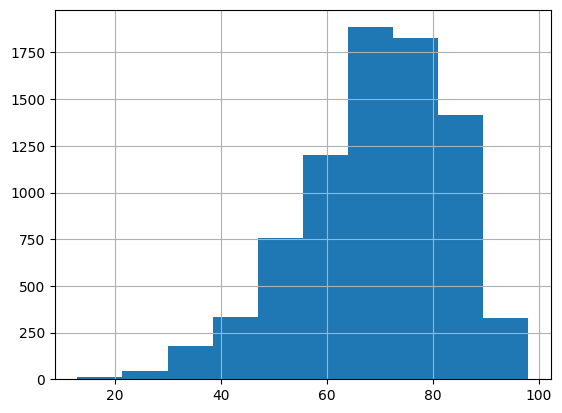

In [32]:
df['critic_score'].hist()# Analyze patterns in missing values

the histogram appears normal giving a perception of no missing values

In [33]:
#df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
df['critic_score']

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16710     NaN
16711     NaN
16712     NaN
16713     NaN
16714     NaN
Name: critic_score, Length: 16446, dtype: float64

I have used hashtag to correct mean issuse

In [34]:
#df['rating'] = df['rating'].fillna(method = 'pad')
df['rating'] = df['rating'].fillna('Unknown')
df['rating']

0              E
1        Unknown
2              E
3              E
4        Unknown
          ...   
16710    Unknown
16711    Unknown
16712    Unknown
16713    Unknown
16714    Unknown
Name: rating, Length: 16446, dtype: object

I have used unknown to replace missing ratings values

In [35]:
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  
0            E  
1      Unknown  
2            E  
3            E  
4      Unknown  
...        ...  
16710  Unknown  
16711  Unknown  
16712  Unknown  
16713  Unknown  
16714  Unknown  

[16446 rows x 11 columns]

In [36]:
# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.

### 2.4 Calculate Total Sales

In [37]:
df['total_sales'] = df['na_sales']+df['eu_sales']+ df['jp_sales']+df['other_sales']
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  total_sales  
0            E        82.54  
1      Unknown        40.24  
2            E        35.52  
3            E        32.77  
4      Unknown        31.38  
...        ...          ...  
16710  Unknown         0.01  
16711  Unknown         0.01  
16712  Unknown         0.01  
16713  Unknown         0.01  
16714  Unknown         0.01  

[16446 rows x 12 columns]

In [38]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  total_sales  
0            E        82.54  
1      Unknown        40.24  
2            E        35.52  
3            E        32.77  
4      Unknown        31.38  
...        ...          ...  
16710  Unknown         0.01  
16711  Unknown         0.01  
16712  Unknown         0.01  
16713  Unknown         0.01  
16714  Unknown         0.01  

[16446 rows x 12 columns]

In [39]:
df['total_sales'].sum()

8816.79

added total_sales to df

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [40]:
year_of_game = df.groupby(['year_of_release','name','genre']).sum()
year_of_game


na_sales  \
year_of_release name                                               genre                    
1980            Asteroids                                          Shooter           4.00   
                Boxing                                             Fighting          0.72   
                Bridge                                             Misc              0.25   
                Checkers                                           Misc              0.22   
                Defender                                           Misc              0.99   
...                                                                                   ...   
2016            Ys VIII: Lacrimosa of Dana                         Role-Playing      0.00   
                Yuusha Shisu.                                      Role-Playing      0.00   
                Zero Escape: Zero Time Dilemma                     Adventure         0.08   
                Zettai Kaikyuu Gakuen: Eden with Roses and Phan... Adventure         0.00   
                ZombiU                                             Action            0.00   

                                                                                 eu_sales  \
year_of_release name                                               genre                    
1980            Asteroids                                          Shooter           0.26   
                Boxing                                             Fighting          0.04   
                Bridge                                             Misc              0.02   
                Checkers                                           Misc              0.01   
                Defender                                           Misc              0.05   
...                                                                                   ...   
2016            Ys VIII: Lacrimosa of Dana                         Role-Playing      0.00   
                Yuusha Shisu.                                      Role-Playing      0.00   
                Zero Escape: Zero Time Dilemma                     Adventure         0.00   
                Zettai Kaikyuu Gakuen: Eden with Roses and Phan... Adventure         0.00   
                ZombiU                                             Action            0.05   

                                                                                 jp_sales  \
year_of_release name                                               genre                    
1980            Asteroids                                          Shooter           0.00   
                Boxing                                             Fighting          0.00   
                Bridge                                             Misc              0.00   
                Checkers                                           Misc              0.00   
                Defender                                           Misc              0.00   
...                                                                                   ...   
2016            Ys VIII: Lacrimosa of Dana                         Role-Playing      0.09   
                Yuusha Shisu.                                      Role-Playing      0.03   
                Zero Escape: Zero Time Dilemma                     Adventure         0.04   
                Zettai Kaikyuu Gakuen: Eden with Roses and Phan... Adventure         0.01   
                ZombiU                                             Action            0.01   

                                                                                 other_sales  \
year_of_release name                                               genre                       
1980            Asteroids                                          Shooter              0.05   
                Boxing                                             Fighting             0.01   
                Bridge                                             

In [41]:
games_per_year = year_of_game.groupby('year_of_release').size().reset_index()
games_per_year# Create a DataFrame with game releases by year

year_of_release     0
0              1980     9
1              1981    46
2              1982    36
3              1983    17
4              1984    14
5              1985    14
6              1986    21
7              1987    16
8              1988    15
9              1989    17
10             1990    16
11             1991    40
12             1992    41
13             1993    59
14             1994   117
15             1995   215
16             1996   258
17             1997   282
18             1998   364
19             1999   326
20             2000   325
21             2001   428
22             2002   631
23             2003   546
24             2004   550
25             2005   657
26             2006   773
27             2007   884
28             2008  1039
29             2009  1001
30             2010   900
31             2011   779
32             2012   447
33             2013   335
34             2014   319
35             2015   362
36             2016   297

<AxesSubplot:xlabel='year_of_release'>

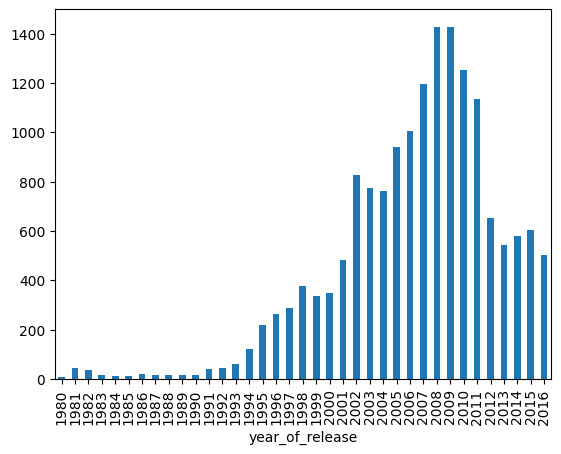

In [42]:
games_per_year = df.groupby('year_of_release').size()#.reset_index()
games_per_year.plot(kind = 'bar')# Visualize the distribution of games across years

In [43]:
yearly_stats = df.groupby('year_of_release').describe()
print(yearly_stats)# Display summary statistics for each year

                na_sales                                                   \
                   count      mean       std   min     25%    50%     75%   
year_of_release                                                             
1980                 9.0  1.176667  1.282624  0.22  0.3200  0.720  1.0700   
1981                46.0  0.726087  0.730885  0.12  0.2925  0.435  0.8925   
1982                36.0  0.747778  1.172248  0.13  0.3150  0.500  0.7225   
1983                17.0  0.456471  0.278903  0.01  0.3100  0.430  0.5100   
1984                14.0  2.377143  7.089785  0.00  0.0450  0.345  0.7700   
1985                14.0  2.409286  7.689309  0.00  0.0000  0.285  0.6025   
1986                21.0  0.595238  0.881542  0.00  0.0000  0.320  0.7100   
1987                16.0  0.528750  0.653094  0.00  0.1350  0.370  0.4875   
1988                15.0  1.591333  2.630154  0.00  0.1000  0.590  1.3700   
1989                17.0  2.655882  5.893720  0.00  0.1400  0.660  0.9600   

performed groupby,bar plot and describe gether yearly game stats

game releases show a significant increase in years rangingfrom 2001 to 2009. 2009 being the peak, there's a progressive decline sense that time
I find further investigation required

### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [44]:


platform_year_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum()
platform_year_sales



platform  year_of_release
2600      1980               11.38
          1981               35.68
          1982               28.88
          1983                5.84
          1984                0.27
                             ...  
XB        2008                0.18
XOne      2013               18.96
          2014               54.07
          2015               60.14
          2016               26.15
Name: total_sales, Length: 238, dtype: float64

groupby to observe release year and sales

In [45]:

sales_by_platform = df.pivot_table(
    values='total_sales', 
    index='year_of_release', 
    columns='platform', 
    aggfunc='sum', 
    fill_value=0)
sales_by_platform
# Calculate total sales by platform and year

platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
year_of_release                                                                 
1980             11.38  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1981             35.68  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1982             28.88  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1983              5.84  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1984              0.27  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1985              0.45  0.00   0.00  0.00    0.02   0.00   0.00   0.00   0.00   
1986              0.67  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1987              1.94  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1988              0.74  0.00   0.00  0.00    0.00   1.43   0.00   0.00   0.00   
1989              0.63  0.00   0.00  0.00    0.00  64.97   0.00   0.00   0.00   
1990              0.00  0.00   0.00  0.00    0.00   4.89   0.00   0.00   2.60   
1991              0.00  0.00   0.00  0.00    0.00   5.57   0.00   0.00   4.33   
1992              0.00  0.00   0.00  0.00    0.00  25.49   0.00   0.00  12.64   
1993              0.00  0.00   0.00  0.00    0.00   0.00   0.00   0.00   3.07   
1994              0.00  0.02   0.00  0.00    0.00  12.18   0.00   0.00   8.13   
1995              0.00  0.08   0.00  0.00    0.00   3.60   0.00   0.00   0.00   
1996              0.00  0.00   0.00  0.00    0.00  36.03   0.00   0.00   0.00   
1997              0.00  0.00   0.00  0.00    0.00   6.37   0.00   0.00   0.00   
1998              0.00  0.00   0.00  3.38    0.00  26.90   0.00   0.00   0.00   
1999              0.00  0.00   0.00  5.16    0.00  38.00   0.00   0.00   0.00   
2000              0.00  0.00   0.00  5.99    0.00  19.76   0.07   0.00   0.00   
2001              0.00  0.00   0.00  1.07    0.00   9.24  61.53  26.34   0.00   
2002              0.00  0.00   0.00  0.29    0.00   0.00  74.16  51.81   0.00   
2003              0.00  0.00   0.00  0.00    0.00   0.00  56.67  50.61   0.00   
2004              0.00  0.00   0.00  0.00   17.27   0.00  77.91  28.82   0.00   
2005              0.00  0.00   0.00  0.00  130.14   0.00  33.86  27.62   0.00   
2006              0.00  0.00   0.00  0.00  119.81   0.00   5.28  11.26   0.00   
2007              0.00  0.00   0.00  0.02  146.94   0.00   3.40   0.27   0.00   
2008              0.00  0.00   0.00  0.04  145.31   0.00   0.00   0.00   0.00   
2009              0.00  0.00   0.00  0.00  119.54   0.00   0.00   0.00   0.00   
2010              0.00  0.00   0.00  0.00   85.02   0.00   0.00   0.00   0.00   
2011              0.00  0.00  63.20  0.00   26.18   0.00   0.00   0.00   0.00   
2012              0.00  0.00  51.36  0.00   11.01   0.00   0.00   0.00   0.00   
2013              0.00  0.00  56.57  0.00    1.54   0.00   0.00   0.00   0.00   
2014              0.00  0.00  43.76  0.00    0.00   0.00   0.00   0.00   0.00   
2015              0.00  0.00  27.78  0.00    0.00   0.00   0.00   0.00   0.00   
2016              0.00  0.00  15.14  0.00    0.00   0.00   0.00   0.00   0.00   

platform           GG  ...    SAT   SCD   SNES  TG16    WS     Wii   WiiU  \
year_of_release        ...                                                  
1980             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1981             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1982             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1983             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1984             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1985             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1986             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1987             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1988             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0

pivot to observe platform performance

In [46]:
import seaborn as sns

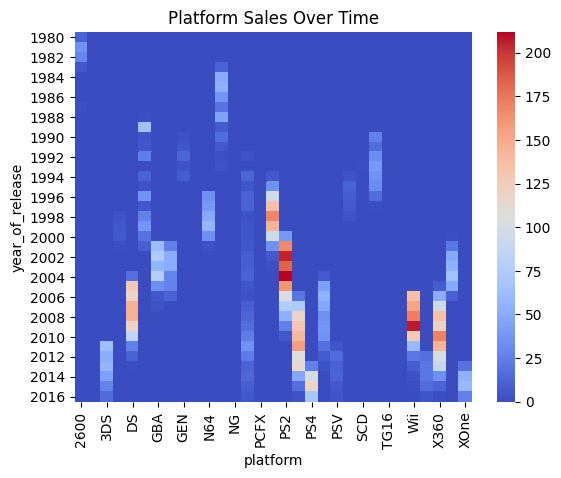

In [47]:
sns.heatmap(sales_by_platform, annot = False, cmap= 'coolwarm')
plt.title('Platform Sales Over Time')
plt.show()# Create a heatmap of platform sales over time

occording to obseration PS has dominated the market for the last few decades with X being it's closest rival 

heat map to see over view of lifecycle

In [48]:
trends_relevant_years = sales_by_platform.max()
print("Top 10 platforms by peak sales:")
print(trends_relevant_years.sort_values(ascending=False).head(10))# Identify platforms with declining sales

Top 10 platforms by peak sales:
platform
PS2     211.81
Wii     206.97
X360    170.03
PS      169.49
PS3     156.78
DS      146.94
PS4     118.90
GBA      77.91
XB       65.42
GB       64.97
dtype: float64


observe platforms highest sales performance

In [49]:

for platform in sales_by_platform.columns:
    platform_data = sales_by_platform[platform]
    active_data = platform_data[platform_data.notna() & (platform_data != 0)]
    if len(active_data) < 2:
        print(f"\nPlatform: {platform} - Not enough data for trend analysis.")
        print("-" * 40)
        continue
    trend = active_data.pct_change().dropna()
    print(f"\nPlatform: {platform}")
    print("Sales Lifecycle Trend (% change):")
    print(trend.tail().apply(lambda x: f"{x:.2%}"))  # Format nicely
    print(f"Duration: {active_data.index[0]} to {active_data.index[-1]}")
    print("-" * 40)



Platform: 2600
Sales Lifecycle Trend (% change):
year_of_release
1985     66.67%
1986     48.89%
1987    189.55%
1988    -61.86%
1989    -14.86%
Name: 2600, dtype: object
Duration: 1980 to 1989
----------------------------------------

Platform: 3DO
Sales Lifecycle Trend (% change):
year_of_release
1995    300.00%
Name: 3DO, dtype: object
Duration: 1994 to 1995
----------------------------------------

Platform: 3DS
Sales Lifecycle Trend (% change):
year_of_release
2012    -18.73%
2013     10.14%
2014    -22.64%
2015    -36.52%
2016    -45.50%
Name: 3DS, dtype: object
Duration: 2011 to 2016
----------------------------------------

Platform: DC
Sales Lifecycle Trend (% change):
year_of_release
2000     16.09%
2001    -82.14%
2002    -72.90%
2007    -93.10%
2008    100.00%
Name: DC, dtype: object
Duration: 1998 to 2008
----------------------------------------

Platform: DS
Sales Lifecycle Trend (% change):
year_of_release
2009    -17.73%
2010    -28.88%
2011    -69.21%
2012    -57.94%


to get a detailed view of platform lifecycle

In [50]:
records = []

# Simulated input structure
for platform in sales_by_platform.columns:
    platform_data = sales_by_platform[platform]
    active_data = platform_data[platform_data.notna() & (platform_data != 0)]

    if len(active_data) < 2:
        continue

    trend = active_data.pct_change().dropna()

    for year, percent in trend.items():
        records.append({
            'Platform': platform,
            'Year': year,
            'Trend (%)': f"{percent:.2%}",
            'Start': active_data.index[0],
            'End': active_data.index[-1]
        })

# Create a DataFrame from collected records
trend_df = pd.DataFrame(records)

trend_df

Platform  Year Trend (%)  Start   End
0       2600  1981   213.53%   1980  1989
1       2600  1982   -19.06%   1980  1989
2       2600  1983   -79.78%   1980  1989
3       2600  1984   -95.38%   1980  1989
4       2600  1985    66.67%   1980  1989
..       ...   ...       ...    ...   ...
202       XB  2007   -94.52%   2000  2008
203       XB  2008   -67.27%   2000  2008
204     XOne  2014   185.18%   2013  2016
205     XOne  2015    11.23%   2013  2016
206     XOne  2016   -56.52%   2013  2016

[207 rows x 5 columns]

looking at percentages

In [51]:
trend_df['Trend_Numeric'] = trend_df['Trend (%)'].str.rstrip('%').astype(float)
trend_df.style.applymap(lambda x: 'color: red' if x < 0 else 'color: black', subset=['Trend_Numeric'])

displaying values

### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [52]:

trend_data = []

for platform in sales_by_platform.columns:
    platform_data = sales_by_platform[platform]
    
    # Remove NaN and zero values
    active_data = platform_data[platform_data.notna() & (platform_data != 0)]
    
    if len(active_data) < 2:
        trend_data.append({
            "Platform": platform,
            "Start": None,
            "End": None,
            "Trend Start": None,
            "Trend End": None,
            "Trend 2 (Up)": 0,
            "Trend 1 (Down)": 0,
            #"Neutral (0%)": 0,by year no neutral dates will appear
            "Up Dates": [],
            "Down Dates": [],
            #"Neutral Dates": [],by year no neutral dates will appear
            "Status": "Not enough data"
        })
        continue

    # Calculate % change
    trend = active_data.pct_change().dropna()

    # Classify trends by date
    up_dates = trend[trend > 0].index.tolist()
    down_dates = trend[trend < 0].index.tolist()
    #neutral_dates = trend[trend == 0].index.tolist() by year no neutral dates will appear

    # Append to trend_data
    trend_data.append({
        "Platform": platform,
        "Start": active_data.index[0],
        "End": active_data.index[-1],
        "Trend Start": trend.index[0],
        "Trend End": trend.index[-1],
        "Trend 2 (Up)": len(up_dates),
        "Trend 1 (Down)": len(down_dates),
       # "Neutral (0%)": len(neutral_dates), by year no neutral dates will appear
        "Up Dates": up_dates,
        "Down Dates": down_dates,
        #"Neutral Dates": neutral_dates, by year no neutral dates will appear
        "Status": "OK"
    })

# Create the final DataFrame
lifecycle_df = pd.DataFrame(trend_data)


In [53]:
lifecycle_df[['Start', 'End']] = lifecycle_df[['Start', 'End']].astype('Int64')
lifecycle_df[['Trend Start', 'Trend End']] = lifecycle_df[['Trend Start', 'Trend End']].astype('Int64')
lifecycle_df

Platform  Start   End  Trend Start  Trend End  Trend 2 (Up)  \
0      2600   1980  1989         1981       1989             4   
1       3DO   1994  1995         1995       1995             1   
2       3DS   2011  2016         2012       2016             1   
3        DC   1998  2008         1999       2008             3   
4        DS   1985  2013         2004       2013             3   
5        GB   1988  2001         1989       2001             6   
6       GBA   2000  2007         2001       2007             3   
7        GC   2001  2007         2002       2007             1   
8       GEN   1990  1994         1991       1994             3   
9        GG   <NA>  <NA>         <NA>       <NA>             0   
10      N64   1996  2002         1997       2002             3   
11      NES   1983  1994         1984       1994             5   
12       NG   1993  1996         1994       1996             1   
13       PC   1985  2016         1988       2016            15   
14     PCFX   <NA>  <NA>         <NA>       <NA>             0   
15       PS   1994  2003         1995       2003             4   
16      PS2   2000  2011         2001       2011             3   
17      PS3   2006  2016         2007       2016             6   
18      PS4   2013  2016         2014       2016             2   
19      PSP   2004  2015         2005       2015             3   
20      PSV   2011  2016         2012       2016             2   
21      SAT   1994  1999         1995       1999             1   
22      SCD   1993  1994         1994       1994             0   
23     SNES   1990  1999         1991       1999             3   
24     TG16   <NA>  <NA>         <NA>       <NA>             0   
25       WS   1999  2001         2000       2001             1   
26      Wii   2006  2016         2007       2016             3   
27     WiiU   2012  2016         2013       2016             2   
28     X360   2005  2016         2006       2016             4   
29       XB   2000  2008         2001       2008             4   
30     XOne   2013  2016         2014       2016             2   

    Trend 1 (Down)                                           Up Dates  \
0                5                           [1981, 1985, 1986, 1987]   
1                0                                             [1995]   
2                4                                             [2013]   
3                3                                 [1999, 2000, 2008]   
4                7                                 [2004, 2005, 2007]   
5                6               [1989, 1991, 1992, 1996, 1998, 1999]   
6                4                                 [2001, 2002, 2004]   
7                5                                             [2002]   
8                1                                 [1991, 1992, 1994]   
9                0                                                 []   
10               3                                 [1997, 1998, 1999]   
11               6                     [1984, 1985, 1988, 1990, 1993]   
12               2                                             [1994]   
13              10  [1992, 1994, 1996, 1997, 1999, 2001, 2002, 200...   
14               0                                                 []   
15               5                           [1995, 1996, 1997, 1998]   
16               8                                 [2001, 2002, 2004]   
17               4               [2007, 2008, 2009, 2010, 2011, 2013]   
18               1                                       [2014, 2015]   
19               8                                 [2005, 2006, 2009]   
20               3                                       [2012, 2014]   
21               4                                             [1995]   
22               1                                                 []   
23               6                                 [1992, 1993, 1999]   
24               0                                               

In [54]:
trends_relevant_years = lifecycle_df.loc[lifecycle_df['Trend Start']>=2010]
trends_relevant_years


Platform  Start   End  Trend Start  Trend End  Trend 2 (Up)  \
2       3DS   2011  2016         2012       2016             1   
18      PS4   2013  2016         2014       2016             2   
20      PSV   2011  2016         2012       2016             2   
27     WiiU   2012  2016         2013       2016             2   
30     XOne   2013  2016         2014       2016             2   

    Trend 1 (Down)      Up Dates                Down Dates Status  
2                4        [2013]  [2012, 2014, 2015, 2016]     OK  
18               1  [2014, 2015]                    [2016]     OK  
20               3  [2012, 2014]        [2013, 2015, 2016]     OK  
27               2  [2013, 2014]              [2015, 2016]     OK  
30               1  [2014, 2015]                    [2016]     OK

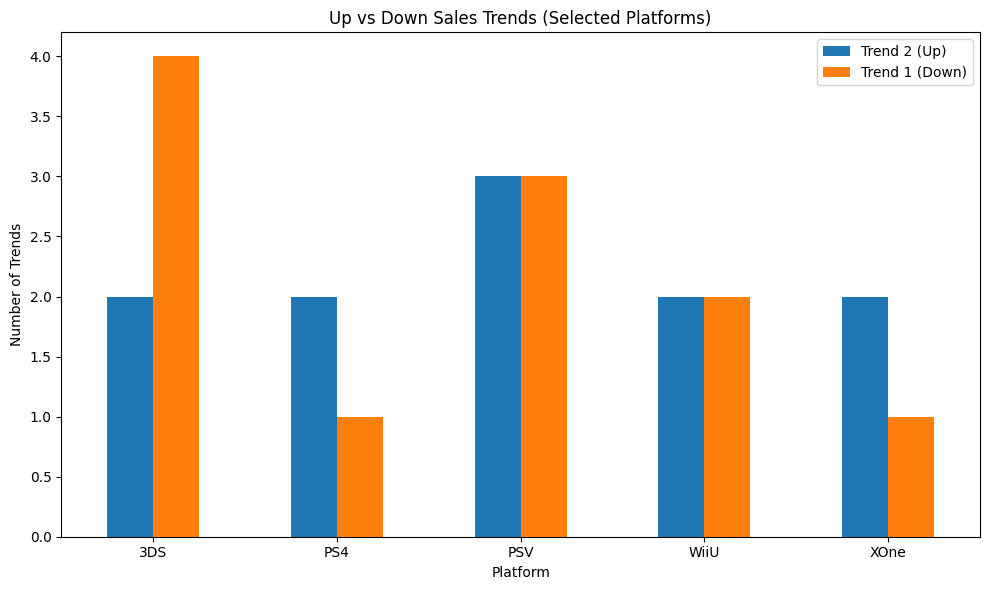

In [55]:
filtered_data = [
    {"Platform": "3DS", "Trend 2 (Up)": 2, "Trend 1 (Down)": 4},
    {"Platform": "PS4", "Trend 2 (Up)": 2, "Trend 1 (Down)": 1},
    {"Platform": "PSV", "Trend 2 (Up)": 3, "Trend 1 (Down)": 3},
    {"Platform": "WiiU", "Trend 2 (Up)": 2, "Trend 1 (Down)": 2},
    {"Platform": "XOne", "Trend 2 (Up)": 2, "Trend 1 (Down)": 1}
]

# Create DataFrame
df_filtered = pd.DataFrame(filtered_data)

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df_filtered.set_index("Platform")[["Trend 2 (Up)", "Trend 1 (Down)"]].plot(kind="bar", ax=ax)
plt.title("Up vs Down Sales Trends (Selected Platforms)")
plt.xlabel("Platform")
plt.ylabel("Number of Trends")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

gives a depiction of the balance beyween up and down trends

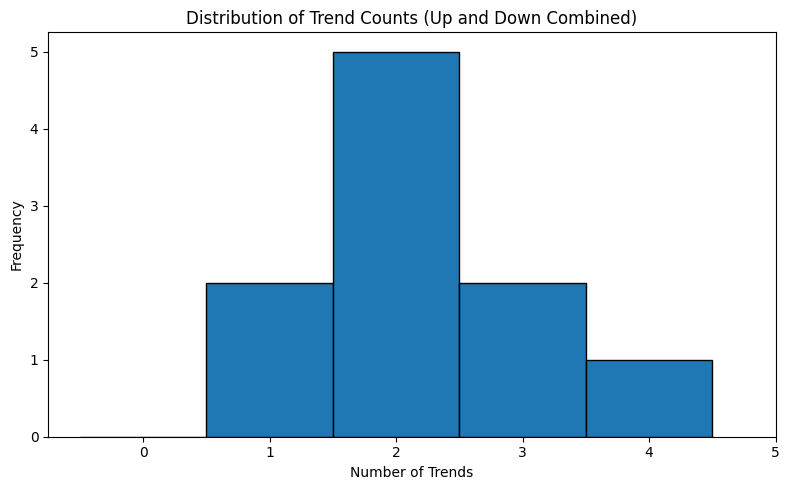

In [56]:
filtered_data = [
    {"Platform": "3DS", "Trend 2 (Up)": 2, "Trend 1 (Down)": 4},
    {"Platform": "PS4", "Trend 2 (Up)": 2, "Trend 1 (Down)": 1},
    {"Platform": "PSV", "Trend 2 (Up)": 3, "Trend 1 (Down)": 3},
    {"Platform": "WiiU", "Trend 2 (Up)": 2, "Trend 1 (Down)": 2},
    {"Platform": "XOne", "Trend 2 (Up)": 2, "Trend 1 (Down)": 1}]

# Plot histogram of all trend counts combined

fig, ax = plt.subplots(figsize=(8, 5))

# Combine Up and Down trend values into a single list
all_trends = df_filtered["Trend 2 (Up)"].tolist() + df_filtered["Trend 1 (Down)"].tolist()

# Plot histogram
ax.hist(all_trends, bins=range(0, max(all_trends)+2), edgecolor='black', align='left')
plt.title("Distribution of Trend Counts (Up and Down Combined)")
plt.xlabel("Number of Trends")
plt.ylabel("Frequency")
plt.xticks(range(0, max(all_trends)+2))
plt.tight_layout()
plt.show()










shows an insightful caption of the volatility of the gaming industry

In [57]:
sales_by_platform

platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
year_of_release                                                                 
1980             11.38  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1981             35.68  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1982             28.88  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1983              5.84  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1984              0.27  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1985              0.45  0.00   0.00  0.00    0.02   0.00   0.00   0.00   0.00   
1986              0.67  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1987              1.94  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1988              0.74  0.00   0.00  0.00    0.00   1.43   0.00   0.00   0.00   
1989              0.63  0.00   0.00  0.00    0.00  64.97   0.00   0.00   0.00   
1990              0.00  0.00   0.00  0.00    0.00   4.89   0.00   0.00   2.60   
1991              0.00  0.00   0.00  0.00    0.00   5.57   0.00   0.00   4.33   
1992              0.00  0.00   0.00  0.00    0.00  25.49   0.00   0.00  12.64   
1993              0.00  0.00   0.00  0.00    0.00   0.00   0.00   0.00   3.07   
1994              0.00  0.02   0.00  0.00    0.00  12.18   0.00   0.00   8.13   
1995              0.00  0.08   0.00  0.00    0.00   3.60   0.00   0.00   0.00   
1996              0.00  0.00   0.00  0.00    0.00  36.03   0.00   0.00   0.00   
1997              0.00  0.00   0.00  0.00    0.00   6.37   0.00   0.00   0.00   
1998              0.00  0.00   0.00  3.38    0.00  26.90   0.00   0.00   0.00   
1999              0.00  0.00   0.00  5.16    0.00  38.00   0.00   0.00   0.00   
2000              0.00  0.00   0.00  5.99    0.00  19.76   0.07   0.00   0.00   
2001              0.00  0.00   0.00  1.07    0.00   9.24  61.53  26.34   0.00   
2002              0.00  0.00   0.00  0.29    0.00   0.00  74.16  51.81   0.00   
2003              0.00  0.00   0.00  0.00    0.00   0.00  56.67  50.61   0.00   
2004              0.00  0.00   0.00  0.00   17.27   0.00  77.91  28.82   0.00   
2005              0.00  0.00   0.00  0.00  130.14   0.00  33.86  27.62   0.00   
2006              0.00  0.00   0.00  0.00  119.81   0.00   5.28  11.26   0.00   
2007              0.00  0.00   0.00  0.02  146.94   0.00   3.40   0.27   0.00   
2008              0.00  0.00   0.00  0.04  145.31   0.00   0.00   0.00   0.00   
2009              0.00  0.00   0.00  0.00  119.54   0.00   0.00   0.00   0.00   
2010              0.00  0.00   0.00  0.00   85.02   0.00   0.00   0.00   0.00   
2011              0.00  0.00  63.20  0.00   26.18   0.00   0.00   0.00   0.00   
2012              0.00  0.00  51.36  0.00   11.01   0.00   0.00   0.00   0.00   
2013              0.00  0.00  56.57  0.00    1.54   0.00   0.00   0.00   0.00   
2014              0.00  0.00  43.76  0.00    0.00   0.00   0.00   0.00   0.00   
2015              0.00  0.00  27.78  0.00    0.00   0.00   0.00   0.00   0.00   
2016              0.00  0.00  15.14  0.00    0.00   0.00   0.00   0.00   0.00   

platform           GG  ...    SAT   SCD   SNES  TG16    WS     Wii   WiiU  \
year_of_release        ...                                                  
1980             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1981             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1982             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1983             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1984             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1985             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1986             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1987             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1988             0.00  ...   0.00  0.00   0.00  0.00  0.00    0.00   0

In [58]:
sales_by_platform[-7:]

platform         2600  3DO    3DS   DC     DS   GB  GBA   GC  GEN   GG  ...  \
year_of_release                                                         ...   
2010              0.0  0.0   0.00  0.0  85.02  0.0  0.0  0.0  0.0  0.0  ...   
2011              0.0  0.0  63.20  0.0  26.18  0.0  0.0  0.0  0.0  0.0  ...   
2012              0.0  0.0  51.36  0.0  11.01  0.0  0.0  0.0  0.0  0.0  ...   
2013              0.0  0.0  56.57  0.0   1.54  0.0  0.0  0.0  0.0  0.0  ...   
2014              0.0  0.0  43.76  0.0   0.00  0.0  0.0  0.0  0.0  0.0  ...   
2015              0.0  0.0  27.78  0.0   0.00  0.0  0.0  0.0  0.0  0.0  ...   
2016              0.0  0.0  15.14  0.0   0.00  0.0  0.0  0.0  0.0  0.0  ...   

platform         SAT  SCD  SNES  TG16   WS     Wii   WiiU    X360   XB   XOne  
year_of_release                                                                
2010             0.0  0.0   0.0   0.0  0.0  127.95   0.00  170.03  0.0   0.00  
2011             0.0  0.0   0.0   0.0  0.0   59.65   0.00  143.84  0.0   0.00  
2012             0.0  0.0   0.0   0.0  0.0   21.71  17.56   99.74  0.0   0.00  
2013             0.0  0.0   0.0   0.0  0.0    8.59  21.65   88.58  0.0  18.96  
2014             0.0  0.0   0.0   0.0  0.0    3.75  22.03   34.74  0.0  54.07  
2015             0.0  0.0   0.0   0.0  0.0    1.14  16.35   11.96  0.0  60.14  
2016             0.0  0.0   0.0   0.0  0.0    0.18   4.60    1.52  0.0  26.15  

[7 rows x 31 columns]

I'm choosing years from 2010 to 2016 due to the observation of more activity within that timeframe

In [59]:
df_relevant_years = df.loc[df['year_of_release']>=2010] 
df_relevant_years = df_relevant_years.pivot_table(
    values='total_sales', 
    index='year_of_release', 
    columns='platform', 
    aggfunc='sum', 
    fill_value=0)
df_relevant_years# Your code here to filter the dataset to relevant years
# Example: 
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data

platform           3DS     DS     PC   PS2     PS3     PS4    PSP    PSV  \
year_of_release                                                            
2010              0.00  85.02  24.28  5.64  142.17    0.00  35.04   0.00   
2011             63.20  26.18  35.03  0.45  156.78    0.00  17.82   4.63   
2012             51.36  11.01  23.22  0.00  107.36    0.00   7.69  16.19   
2013             56.57   1.54  12.38  0.00  113.25   25.99   3.14  10.59   
2014             43.76   0.00  13.28  0.00   47.76  100.00   0.24  11.90   
2015             27.78   0.00   8.52  0.00   16.82  118.90   0.12   6.25   
2016             15.14   0.00   5.25  0.00    3.60   69.25   0.00   4.25   

platform            Wii   WiiU    X360   XOne  
year_of_release                                
2010             127.95   0.00  170.03   0.00  
2011              59.65   0.00  143.84   0.00  
2012              21.71  17.56   99.74   0.00  
2013               8.59  21.65   88.58  18.96  
2014               3.75  22.03   34.74  54.07  
2015               1.14  16.35   11.96  60.14  
2016               0.18   4.60    1.52  26.15

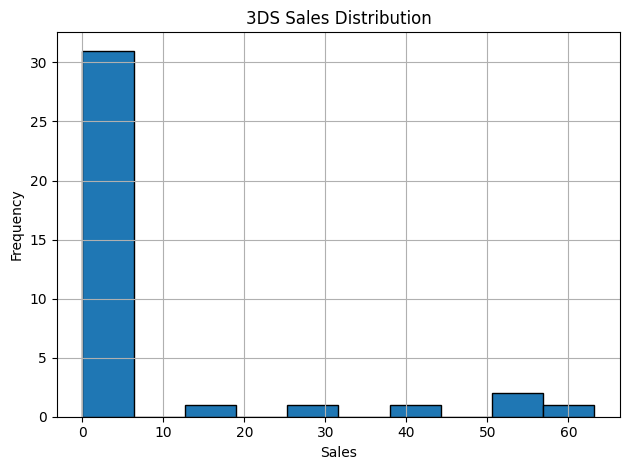

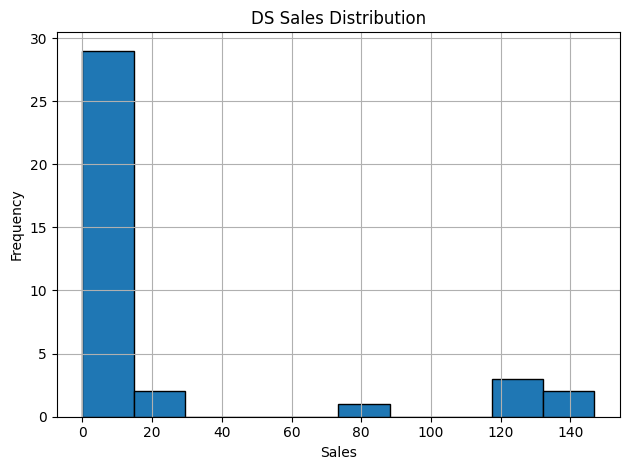

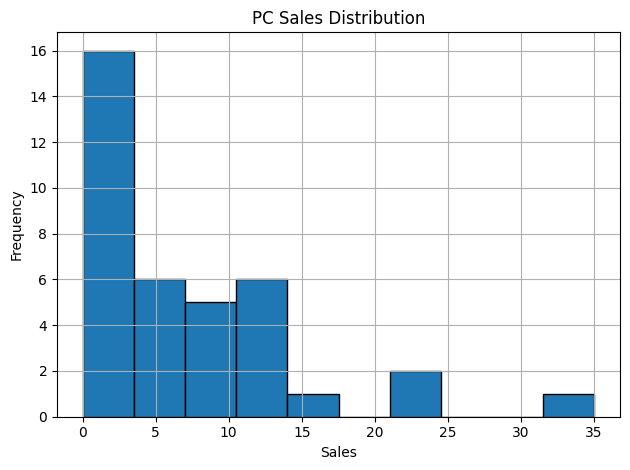

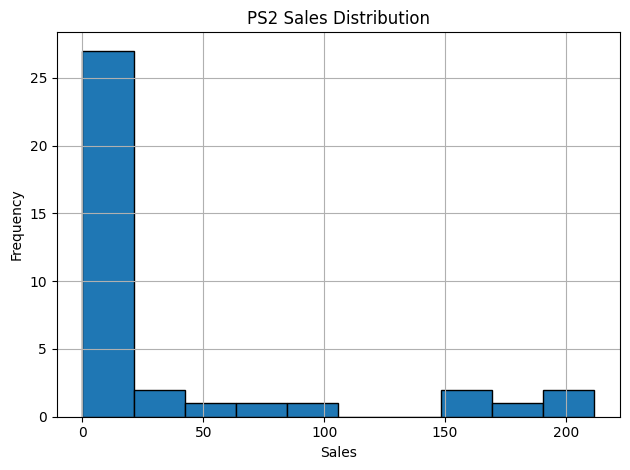

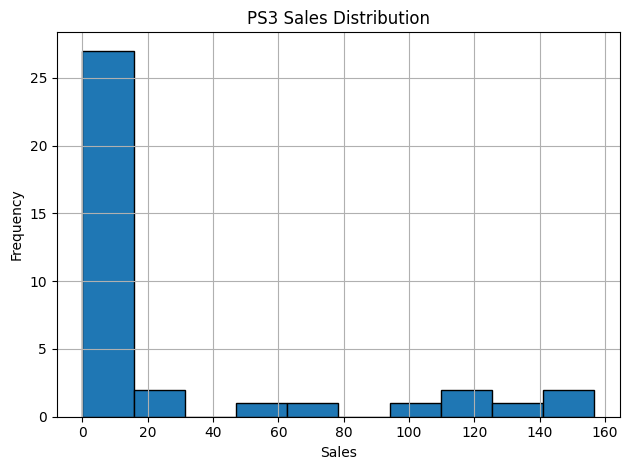

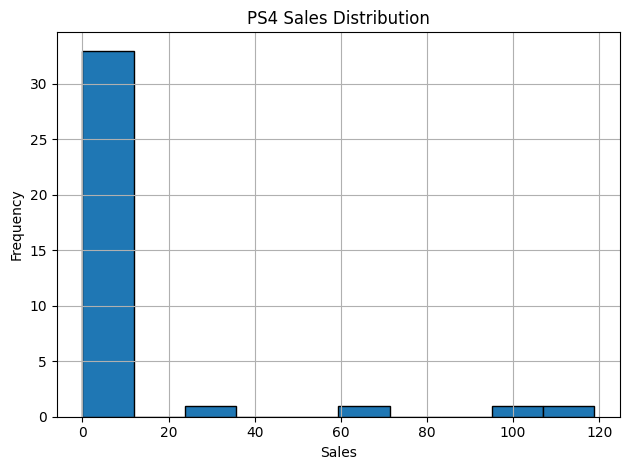

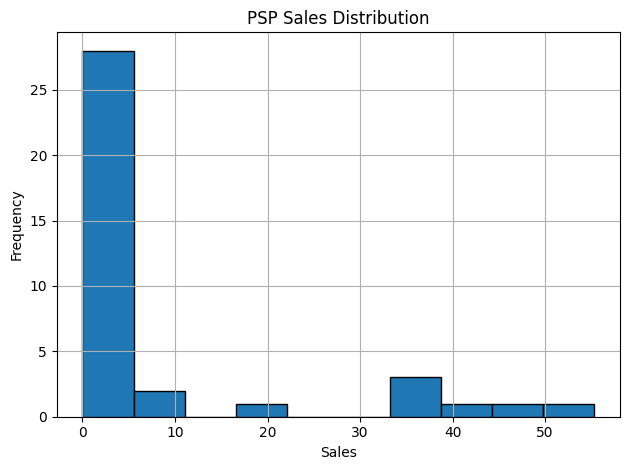

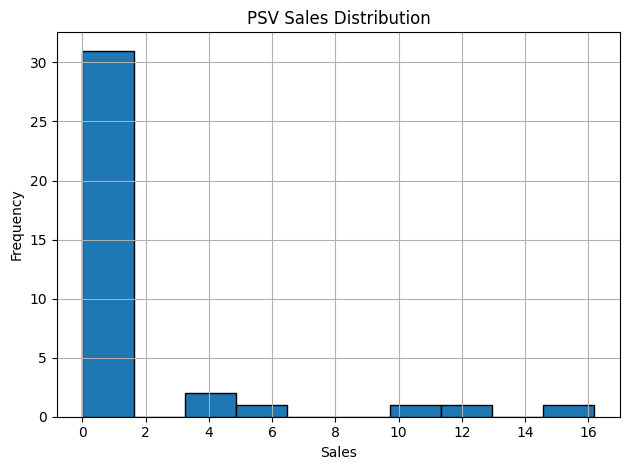

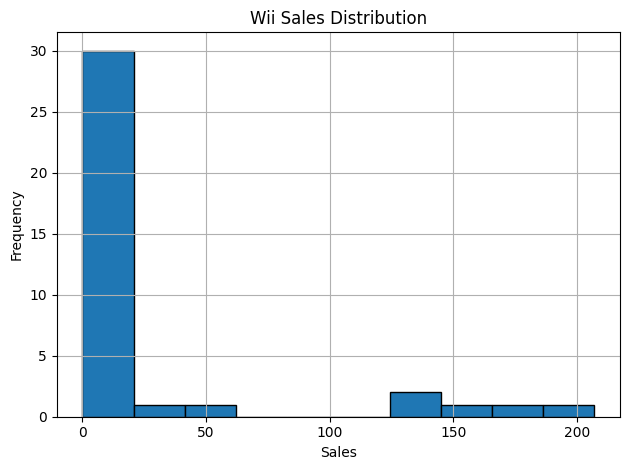

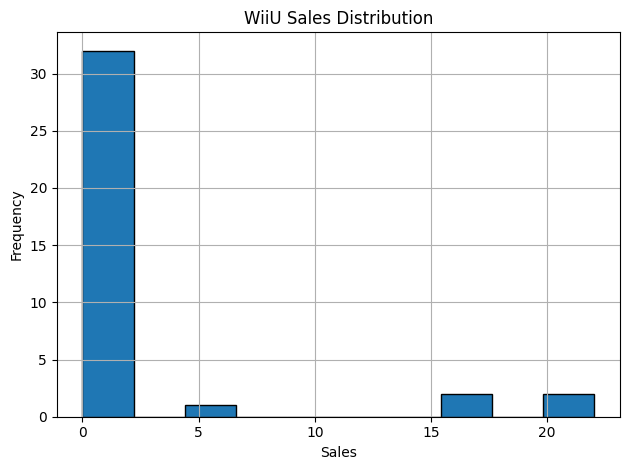

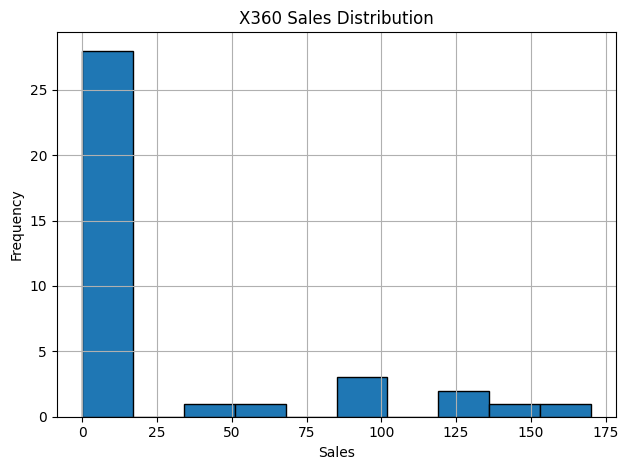

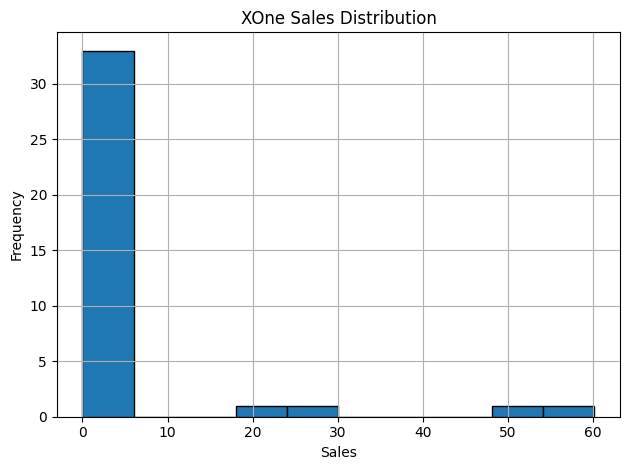

In [60]:


# List of platforms to plot
platforms = ["3DS", "DS", "PC", "PS2", "PS3", "PS4", "PSP", "PSV", "Wii", "WiiU", "X360", "XOne"]

# Loop through each platform and plot a histogram of sales
for platform in platforms:
    if platform in sales_by_platform.columns:
        data = sales_by_platform[platform].dropna()

        plt.figure()
        plt.hist(data, bins=10, edgecolor='black')
        plt.title(f"{platform} Sales Distribution")
        plt.xlabel("Sales")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: {platform} not found in DataFrame.")


across platforms only a few games have higher sales while most have only a few sales

### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [61]:
relevant_years = df[df['year_of_release'] >= 2011].copy()
relevant_years 

name platform  year_of_release         genre  \
16                 Grand Theft Auto V      PS3             2013        Action   
23                 Grand Theft Auto V     X360             2013        Action   
29     Call of Duty: Modern Warfare 3     X360             2011       Shooter   
31          Call of Duty: Black Ops 3      PS4             2015       Shooter   
33                Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
...                               ...      ...              ...           ...   
16703                Strawberry Nauts      PSV             2016     Adventure   
16707                Aiyoku no Eustia      PSV             2014          Misc   
16710   Samurai Warriors: Sanada Maru      PS3             2016        Action   
16712         Haitaka no Psychedelica      PSV             2016     Adventure   
16714             Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16         7.02      9.09      0.98         3.96          97.0         8.2   
23         9.66      5.14      0.06         1.41          97.0         8.1   
29         9.04      4.24      0.13         1.32          88.0         3.4   
31         6.03      5.86      0.36         2.38           NaN         NaN   
33         5.28      4.19      4.35         0.78           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16703      0.00      0.00      0.01         0.00           NaN         NaN   
16707      0.00      0.00      0.01         0.00           NaN         NaN   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  total_sales  
16           M        21.05  
23           M        16.27  
29           M        14.73  
31     Unknown        14.63  
33     Unknown        14.60  
...        ...          ...  
16703  Unknown         0.01  
16707  Unknown         0.01  
16710  Unknown         0.01  
16712  Unknown         0.01  
16714  Unknown         0.01  

[4022 rows x 12 columns]

In [62]:
df_relevant_years.reset_index() # Analyze platform sales trends

platform  year_of_release    3DS     DS     PC   PS2     PS3     PS4    PSP  \
0                    2010   0.00  85.02  24.28  5.64  142.17    0.00  35.04   
1                    2011  63.20  26.18  35.03  0.45  156.78    0.00  17.82   
2                    2012  51.36  11.01  23.22  0.00  107.36    0.00   7.69   
3                    2013  56.57   1.54  12.38  0.00  113.25   25.99   3.14   
4                    2014  43.76   0.00  13.28  0.00   47.76  100.00   0.24   
5                    2015  27.78   0.00   8.52  0.00   16.82  118.90   0.12   
6                    2016  15.14   0.00   5.25  0.00    3.60   69.25   0.00   

platform    PSV     Wii   WiiU    X360   XOne  
0          0.00  127.95   0.00  170.03   0.00  
1          4.63   59.65   0.00  143.84   0.00  
2         16.19   21.71  17.56   99.74   0.00  
3         10.59    8.59  21.65   88.58  18.96  
4         11.90    3.75  22.03   34.74  54.07  
5          6.25    1.14  16.35   11.96  60.14  
6          4.25    0.18   4.60    1.52  26.15

In [63]:

trends_relevant_years = trend_df.loc[trend_df['Year']>=2010]



In [64]:
trends_relevant_years.style.bar(subset=['Trend_Numeric'],color =['red', 'lightgreen'],align ='zero')

Text(0, 0.5, 'Platform')

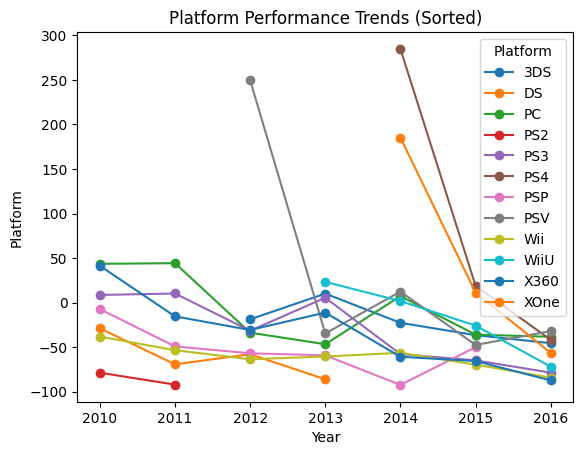

In [65]:
trends_relevant_years
relevant_years['Trend_Numeric'] = trends_relevant_years['Trend (%)'].str.rstrip('%').astype(float)
trend_sorted = trends_relevant_years.sort_values('Trend_Numeric')
trend_sorted.pivot(index = 'Year',columns = 'Platform', values ='Trend_Numeric').plot(kind='line', marker='o')
plt.title('Platform Performance Trends (Sorted)')
plt.ylabel('Platform')


It reflects the current trends of the market

In [66]:
sales_by_platform[-7:].reset_index()# Sort platforms by total sales

platform  year_of_release  2600  3DO    3DS   DC     DS   GB  GBA   GC  GEN  \
0                    2010   0.0  0.0   0.00  0.0  85.02  0.0  0.0  0.0  0.0   
1                    2011   0.0  0.0  63.20  0.0  26.18  0.0  0.0  0.0  0.0   
2                    2012   0.0  0.0  51.36  0.0  11.01  0.0  0.0  0.0  0.0   
3                    2013   0.0  0.0  56.57  0.0   1.54  0.0  0.0  0.0  0.0   
4                    2014   0.0  0.0  43.76  0.0   0.00  0.0  0.0  0.0  0.0   
5                    2015   0.0  0.0  27.78  0.0   0.00  0.0  0.0  0.0  0.0   
6                    2016   0.0  0.0  15.14  0.0   0.00  0.0  0.0  0.0  0.0   

platform  ...  SAT  SCD  SNES  TG16   WS     Wii   WiiU    X360   XB   XOne  
0         ...  0.0  0.0   0.0   0.0  0.0  127.95   0.00  170.03  0.0   0.00  
1         ...  0.0  0.0   0.0   0.0  0.0   59.65   0.00  143.84  0.0   0.00  
2         ...  0.0  0.0   0.0   0.0  0.0   21.71  17.56   99.74  0.0   0.00  
3         ...  0.0  0.0   0.0   0.0  0.0    8.59  21.65   88.58  0.0  18.96  
4         ...  0.0  0.0   0.0   0.0  0.0    3.75  22.03   34.74  0.0  54.07  
5         ...  0.0  0.0   0.0   0.0  0.0    1.14  16.35   11.96  0.0  60.14  
6         ...  0.0  0.0   0.0   0.0  0.0    0.18   4.60    1.52  0.0  26.15  

[7 rows x 32 columns]

In [67]:

overall_bottomle = df[["platform","total_sales"]].groupby("platform").sum().sort_values("total_sales", ascending=False)
overall_bottomle 


total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.34
Wii            891.18
DS             802.78
PS             727.58
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81
PC             255.76
GB             254.43
XB             251.57
NES            251.05
N64            218.01
SNES           200.04
GC             196.73
XOne           159.32
2600            86.48
WiiU            82.19
PSV             53.81
SAT             33.59
GEN             30.77
DC              15.95
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03

In [68]:

# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates


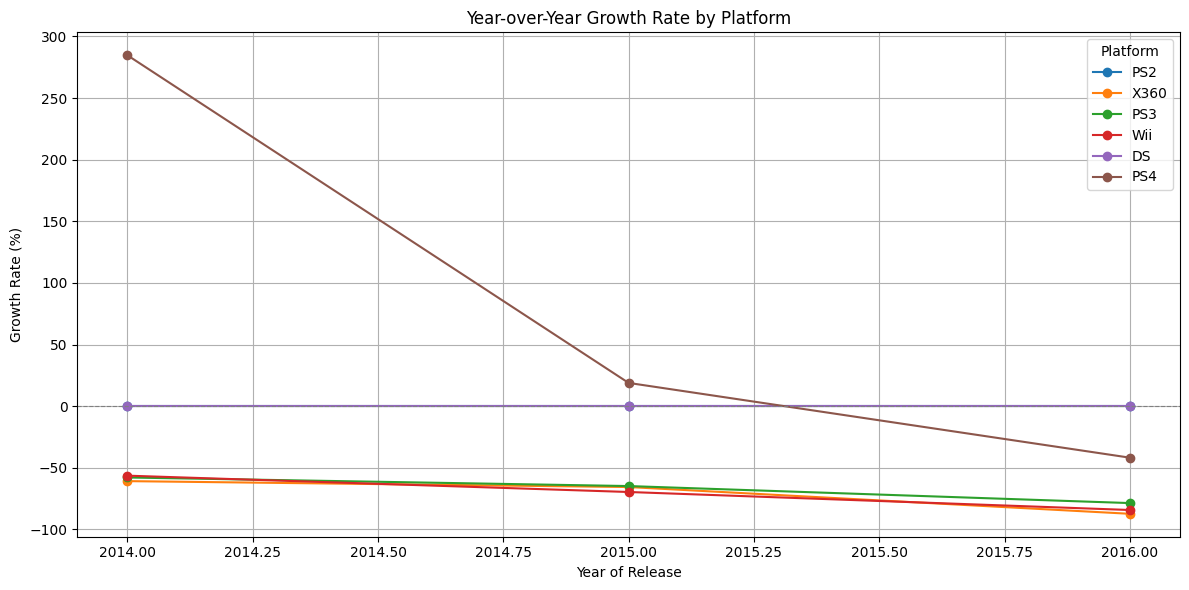

In [69]:
# Ensure your DataFrame has 'year_of_release', 'platform', 'global_sales' columns
# First, group and sum sales per platform per year
platform_sales = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Calculate year-over-year percentage growth for each platform
platform_growth = platform_sales.pct_change() * 100  # Multiply by 100 for percentage

# Optional: Drop early NaN values (first year with no previous year for comparison)
platform_growth = platform_growth.dropna()

# Plot growth trends for selected major platforms (customize as needed)
selected_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4']
platform_growth[selected_platforms].plot(figsize=(12, 6), marker='o')

# Plot formatting
plt.title('Year-over-Year Growth Rate by Platform')
plt.xlabel('Year of Release')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.legend(title='Platform')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Baseline at 0% growth
plt.tight_layout()
plt.show()


All platforms were experiencing sales declines.

I don't know how that happend but it's fixed

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

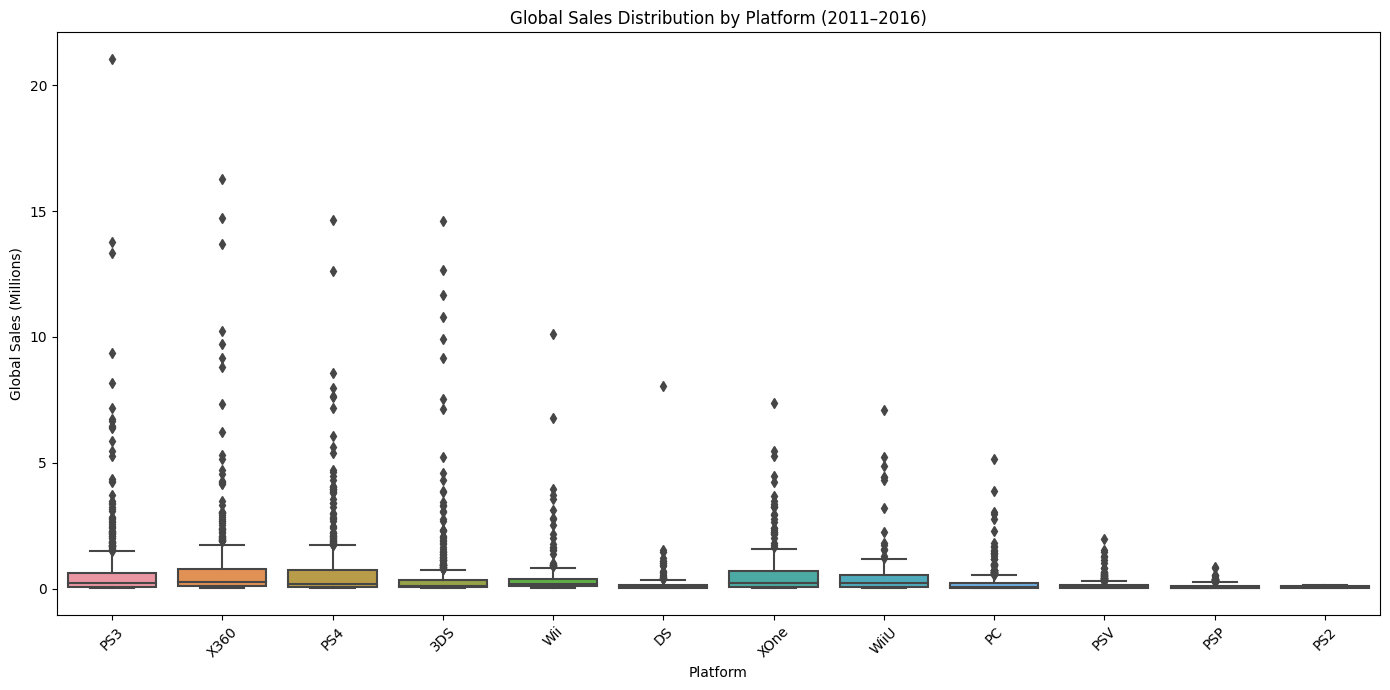

In [70]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=relevant_years, x='platform', y='total_sales')
plt.title('Global Sales Distribution by Platform (2011–2016)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()# Create box plot of sales by platform

once again distribution reflecting trends

In [71]:
df_relevant_years.describe()# Calculate detailed statistics for each platform

platform        3DS         DS         PC       PS2         PS3         PS4  \
count      7.000000   7.000000   7.000000  7.000000    7.000000    7.000000   
mean      36.830000  17.678571  17.422857  0.870000   83.962857   44.877143   
std       23.284465  31.224086  10.493424  2.110047   61.063587   50.843792   
min        0.000000   0.000000   5.250000  0.000000    3.600000    0.000000   
25%       21.460000   0.000000  10.450000  0.000000   32.290000    0.000000   
50%       43.760000   1.540000  13.280000  0.000000  107.360000   25.990000   
75%       53.965000  18.595000  23.750000  0.225000  127.710000   84.625000   
max       63.200000  85.020000  35.030000  5.640000  156.780000  118.900000   

platform        PSP        PSV         Wii       WiiU        X360       XOne  
count      7.000000   7.000000    7.000000   7.000000    7.000000   7.000000  
mean       9.150000   7.687143   31.852857  11.741429   78.630000  22.760000  
std       13.091754   5.489246   47.236286   9.881392   65.151249  25.682567  
min        0.000000   0.000000    0.180000   0.000000    1.520000   0.000000  
25%        0.180000   4.440000    2.445000   2.300000   23.350000   0.000000  
50%        3.140000   6.250000    8.590000  16.350000   88.580000  18.960000  
75%       12.755000  11.245000   40.680000  19.605000  121.790000  40.110000  
max       35.040000  16.190000  127.950000  22.030000  170.030000  60.140000

## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [72]:
ps4_data = relevant_years[(relevant_years['platform'] == 'PS4') &
                          (~relevant_years['user_score'].isna()) &
                          (~relevant_years['critic_score'].isna())]
ps4_data # Choose a popular platform based on your previous analysis

name platform  year_of_release  \
42                        Grand Theft Auto V      PS4             2014   
77                                   FIFA 16      PS4             2015   
92            Call of Duty: Advanced Warfare      PS4             2014   
94                                   FIFA 17      PS4             2016   
105                                Fallout 4      PS4             2015   
...                                      ...      ...              ...   
16486                     Super Dungeon Bros      PS4             2016   
16499  Sherlock Holmes: The Devil's Daughter      PS4             2016   
16500                            Root Letter      PS4             2016   
16526                             Dungeons 2      PS4             2016   
16530                Carmageddon: Max Damage      PS4             2016   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
42           Action      3.96      6.31      0.38         1.97          97.0   
77           Sports      1.12      6.12      0.06         1.28          82.0   
92          Shooter      2.81      3.48      0.14         1.23          83.0   
94           Sports      0.66      5.75      0.08         1.11          85.0   
105    Role-Playing      2.53      3.27      0.24         1.13          87.0   
...             ...       ...       ...       ...          ...           ...   
16486        Action      0.01      0.00      0.00         0.00          42.0   
16499     Adventure      0.01      0.00      0.00         0.00          70.0   
16500     Adventure      0.00      0.00      0.01         0.00          69.0   
16526  Role-Playing      0.01      0.00      0.00         0.00          61.0   
16530        Action      0.01      0.00      0.00         0.00          51.0   

       user_score   rating  total_sales  Trend_Numeric  
42            8.3        M        12.62            NaN  
77            4.3        E         8.58            NaN  
92            5.7        M         7.66            NaN  
94            5.0        E         7.60            NaN  
105           6.5        M         7.17            NaN  
...           ...      ...          ...            ...  
16486         2.3     E10+         0.01            NaN  
16499         6.8        T         0.01            NaN  
16500         7.5  Unknown         0.01            NaN  
16526         7.9        T         0.01            NaN  
16530         5.5        M         0.01            NaN  

[249 rows x 13 columns]

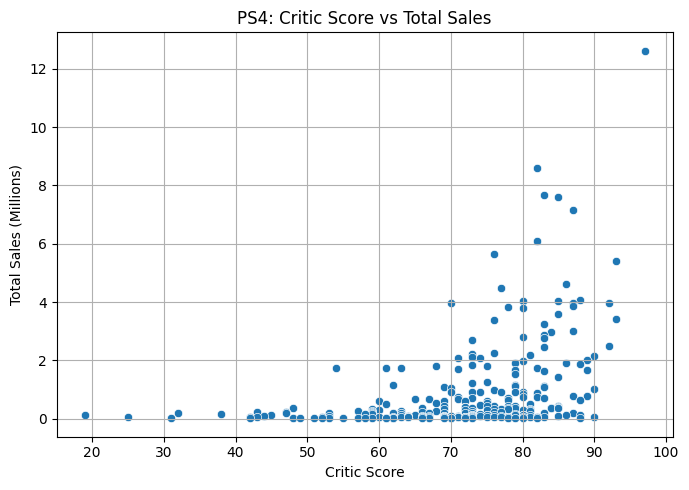

In [73]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=ps4_data, x='critic_score', y='total_sales')
plt.title('PS4: Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')
plt.grid(True)
plt.tight_layout()
plt.show()# Create scatter plots for both critic and user scores

it would appear that higher critic score reflects higher sales

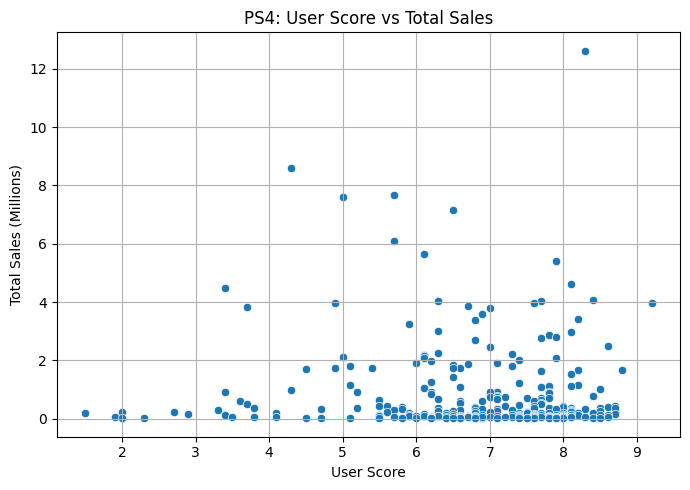

In [74]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=ps4_data, x='user_score', y='total_sales')
plt.title('PS4: User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (Millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

user score is similar to critic score with a few more games above average

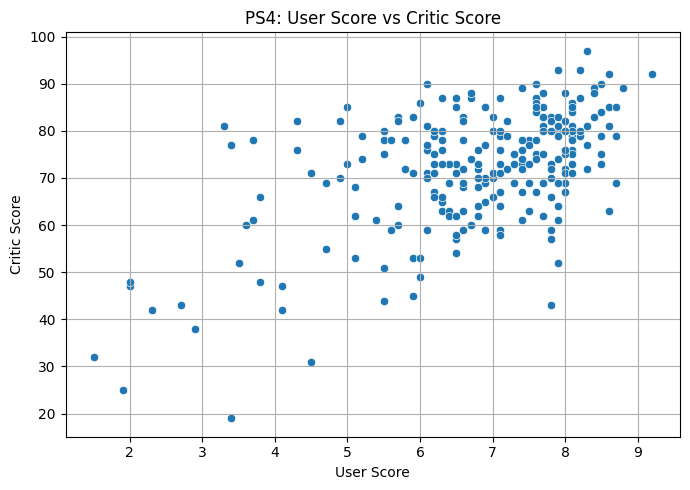

In [75]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=ps4_data, x='user_score', y='critic_score')
plt.title('PS4: User Score vs Critic Score')
plt.xlabel('User Score')
plt.ylabel('Critic Score')
plt.grid(True)
plt.tight_layout()
plt.show()

for the most part critics and users share similar taste

In [76]:
# Critic Scores



# User Scores


print("Correlation with Critic Score:", ps4_data['critic_score'].corr(ps4_data['total_sales']))
print("Correlation with User Score:  ", ps4_data['user_score'].corr(ps4_data['total_sales']))
print("Correlation with User Score:  ", ps4_data['user_score'].corr(ps4_data['critic_score']))# Calculate correlations



Correlation with Critic Score: 0.40589480145836687
Correlation with User Score:   -0.03362497596528878
Correlation with User Score:   0.5576539782764632


Correlation with Critic Score: 0.40656790206178095 this result is of a positive weak correlation
Correlation with User Score:   -0.036895382800550235 this result is of a negetive weak correlation
Correlation with User Score:   0.5546165429383596 this result is of a positive strong correlaton

I have added a descriptive conclusion to each calculation

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [77]:
relevant_years = df[df['year_of_release'] >= 2010]
relevant_years 

name platform  year_of_release         genre  \
14                 Kinect Adventures!     X360             2010          Misc   
16                 Grand Theft Auto V      PS3             2013        Action   
23                 Grand Theft Auto V     X360             2013        Action   
27        Pokemon Black/Pokemon White       DS             2010  Role-Playing   
29     Call of Duty: Modern Warfare 3     X360             2011       Shooter   
...                               ...      ...              ...           ...   
16703                Strawberry Nauts      PSV             2016     Adventure   
16707                Aiyoku no Eustia      PSV             2014          Misc   
16710   Samurai Warriors: Sanada Maru      PS3             2016        Action   
16712         Haitaka no Psychedelica      PSV             2016     Adventure   
16714             Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
14        15.00      4.89      0.24         1.69          61.0         6.3   
16         7.02      9.09      0.98         3.96          97.0         8.2   
23         9.66      5.14      0.06         1.41          97.0         8.1   
27         5.51      3.17      5.65         0.80           NaN         NaN   
29         9.04      4.24      0.13         1.32          88.0         3.4   
...         ...       ...       ...          ...           ...         ...   
16703      0.00      0.00      0.01         0.00           NaN         NaN   
16707      0.00      0.00      0.01         0.00           NaN         NaN   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  total_sales  
14           E        21.82  
16           M        21.05  
23           M        16.27  
27     Unknown        15.13  
29           M        14.73  
...        ...          ...  
16703  Unknown         0.01  
16707  Unknown         0.01  
16710  Unknown         0.01  
16712  Unknown         0.01  
16714  Unknown         0.01  

[5277 rows x 12 columns]

In [78]:
platform_counts = relevant_years.groupby('name')['platform'].count()
multi_platform_games = platform_counts[platform_counts > 1]
multi_platform_games# Find games released on multiple platforms

name
 Frozen: Olaf's Quest                  2
2010 FIFA World Cup South Africa       4
2014 FIFA World Cup Brazil             2
3rd Super Robot Wars Z Jigoku Hen      2
3rd Super Robot Wars Z: Tengoku-Hen    2
                                      ..
de Blob 2                              4
iCarly 2: iJoin The Click!             2
nail'd                                 2
pro evolution soccer 2011              6
uDraw Studio: Instant Artist           2
Name: platform, Length: 1015, dtype: int64

<AxesSubplot:xlabel='name'>

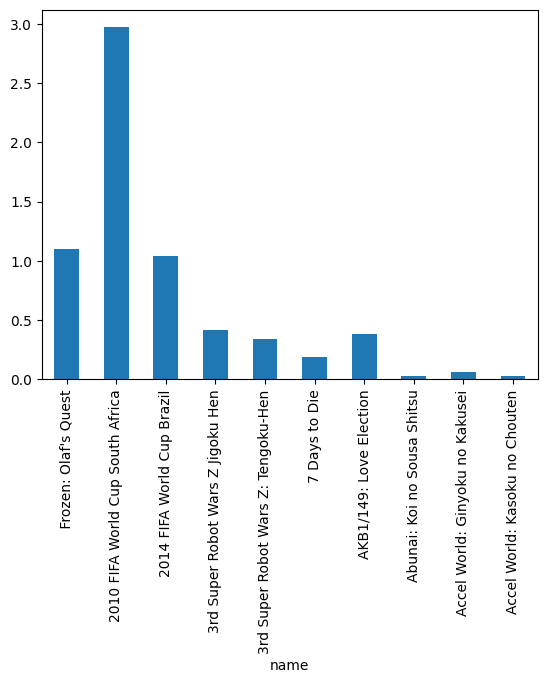

In [79]:
multi_platform_data = relevant_years[relevant_years['name'].isin(multi_platform_games.index)]
multi_platform_summary = multi_platform_data.groupby('name')['total_sales'].sum().head(10)
multi_platform_summary.plot(kind='bar')

2010 FIFA had the strongest presence across platforms

In [80]:
multi_platform_games.head()

name
 Frozen: Olaf's Quest                  2
2010 FIFA World Cup South Africa       4
2014 FIFA World Cup Brazil             2
3rd Super Robot Wars Z Jigoku Hen      2
3rd Super Robot Wars Z: Tengoku-Hen    2
Name: platform, dtype: int64

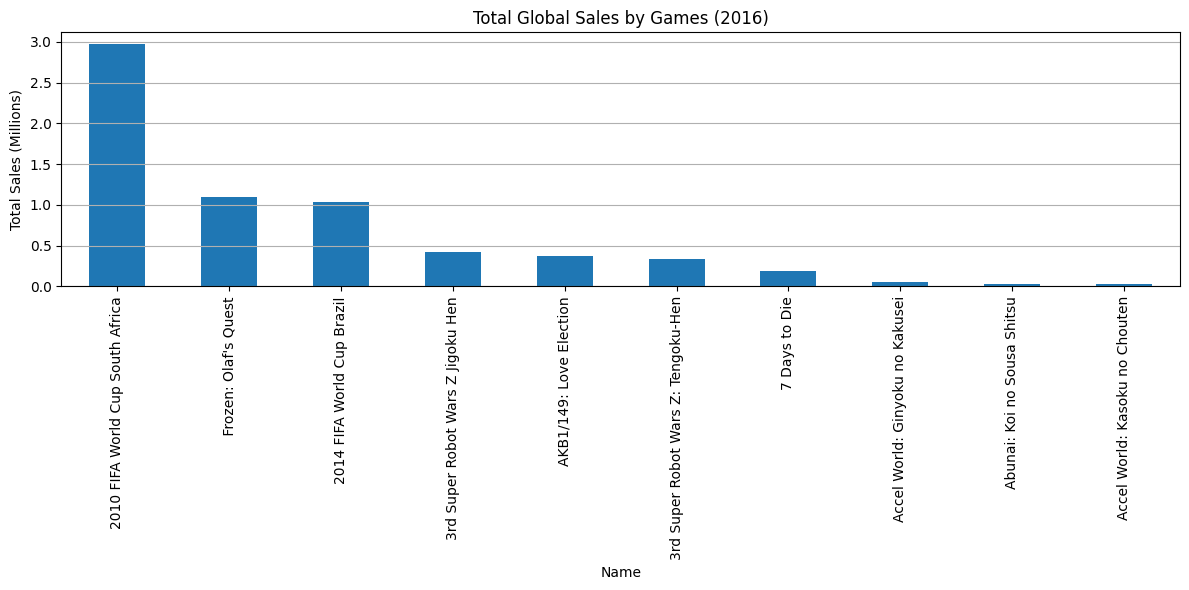

In [81]:
#Compare sales across platforms for these games
plt.figure(figsize=(12, 6))

multi_platform_summary.sort_values(ascending = False).head(10).plot(kind='bar')

plt.title('Total Global Sales by Games (2016)')
plt.xlabel('Name')
plt.ylabel('Total Sales (Millions)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()# Your code here to analyze and visualize cross-platform performance


here again only a few games recieving high marks leaving others in the meager distance

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [82]:
relevant_years['genre'].value_counts()# Analyze genre performance

Action          1495
Misc             576
Sports           575
Role-Playing     568
Adventure        563
Shooter          410
Racing           237
Simulation       217
Fighting         199
Strategy         170
Platform         153
Puzzle           114
Name: genre, dtype: int64

In [83]:
genre_analysis = relevant_years.groupby('genre').agg({
    'total_sales': ['count', 'sum', 'mean'],
    # Add other relevant columns
}).round(2)

In [84]:
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales# Sort genres by total sales

genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64

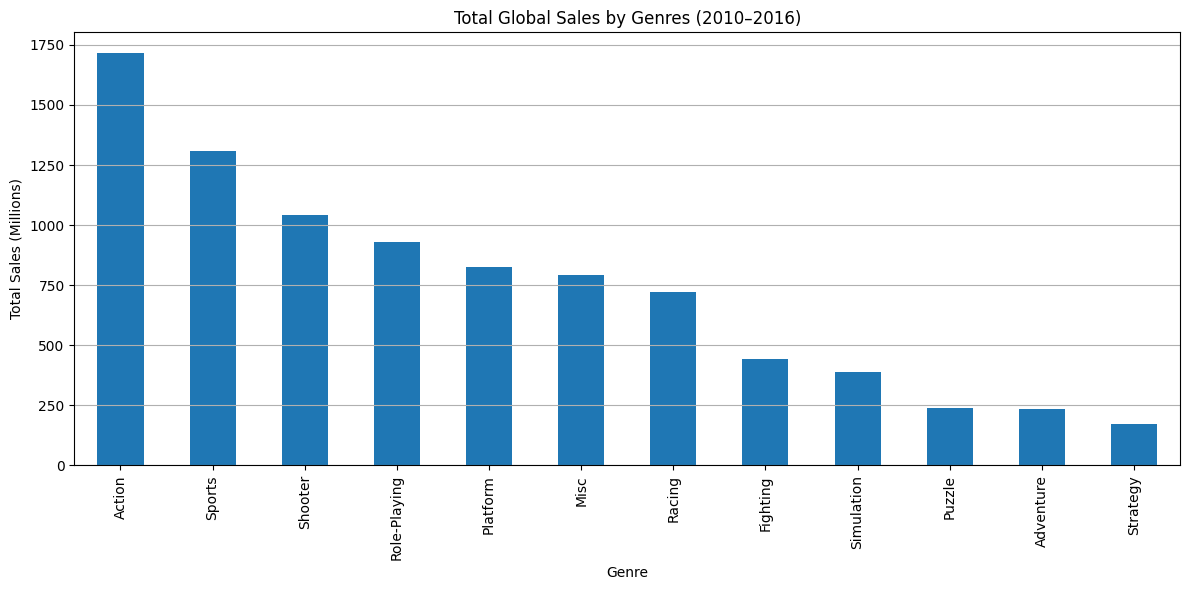

In [85]:
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar')
plt.title('Total Global Sales by Genres (2010–2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()# Visualize genre distribution

only 3 genre exceed supersede(Action games, Shooter, Sports) all the others , leaving much room for growth in those spectrums

In [86]:
genre_sales = relevant_years.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

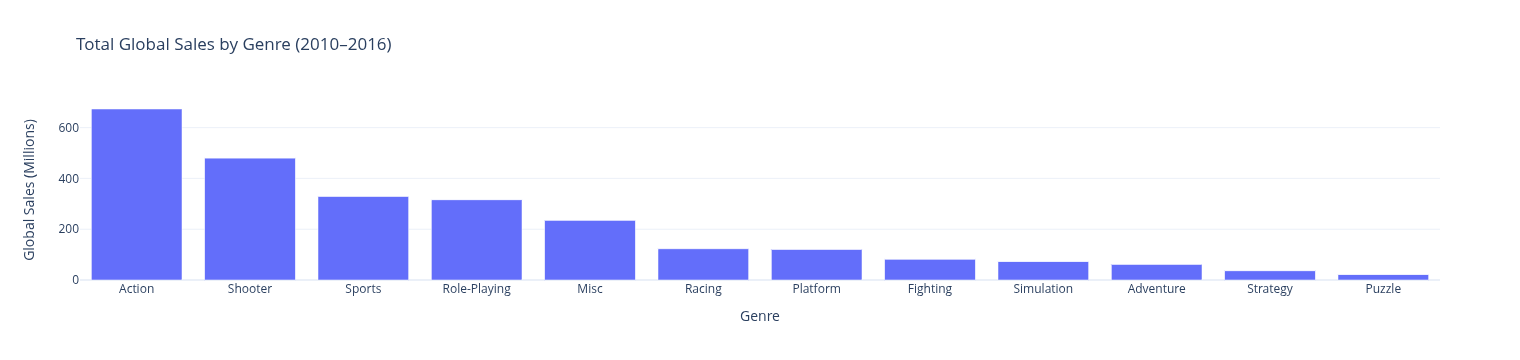

In [87]:

fig = px.bar(
    genre_sales,
    x='genre',
    y='total_sales',
    title='Total Global Sales by Genre (2010–2016)',
    labels={'tota_sales': 'Total Sales (Millions)', 'genre': 'Genre'},
    hover_data={'total_sales': ':.2f'},
)

fig.update_layout(xaxis_title='Genre', yaxis_title='Global Sales (Millions)', template='plotly_white')
fig.show()


a fresher take on earlier chart

In [88]:
genre_totals = relevant_years.groupby('genre')['total_sales'].sum()
total_market = genre_totals.sum()
market_share = (genre_totals / total_market * 100).round(2)

print("Genre Market Share (%):")
print(market_share.sort_values(ascending=False))
# Calculate market share for each genre


Genre Market Share (%):
genre
Action          26.46
Shooter         18.86
Sports          12.91
Role-Playing    12.39
Misc             9.22
Racing           4.82
Platform         4.71
Fighting         3.21
Simulation       2.82
Adventure        2.40
Strategy         1.41
Puzzle           0.81
Name: total_sales, dtype: float64


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

Action games, Shooter, Sports are consistently  the top performers, while revealing no decline in the market.

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [89]:
na_top_platforms = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

# EU
eu_top_platforms = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

# JP
jp_top_platforms = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Display
print("Top 5 Platforms in North America:")
print(na_top_platforms, "\n")

print("Top 5 Platforms in Europe:")
print(eu_top_platforms, "\n")

print("Top 5 Platforms in Japan:")
print(jp_top_platforms)# Function to analyze platform performance by region

Top 5 Platforms in North America:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64 

Top 5 Platforms in Europe:
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64 

Top 5 Platforms in Japan:
platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


In [90]:
regional_totals = {
    'North America': relevant_years['na_sales'].sum(),
    'Europe': relevant_years['eu_sales'].sum(), 
    'Japan': relevant_years['jp_sales'].sum(),
    'Other': relevant_years['other_sales'].sum()
}

print("Total Sales by Region (in millions):")
for region, total in regional_totals.items():
    print(f"{region}: {total:.2f}")# Analyze each region

Total Sales by Region (in millions):
North America: 1130.41
Europe: 841.21
Japan: 305.14
Other: 267.48


In [91]:
total_global = sum(regional_totals.values())
regional_share = {region: (sales/total_global)*100 for region, sales in regional_totals.items()}

print("\nRegional Market Share (%):")
for region, share in regional_share.items():
    print(f"{region}: {share:.1f}%")


Regional Market Share (%):
North America: 44.4%
Europe: 33.1%
Japan: 12.0%
Other: 10.5%


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [92]:
df["global_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]

# Step 3: Create pivot table
sales_by_platform = df.pivot_table(
    index='year_of_release',
    columns='platform',
    values='global_sales',
    aggfunc='sum'
)

sales_by_platform.dropna(axis=1, how='all', inplace=True)

# Step 4: Create comparative metrics
comparative_data = []

for platform in sales_by_platform.columns:
    platform_data = sales_by_platform[platform]
    active_data = platform_data[platform_data.notna() & (platform_data != 0)]

    if len(active_data) < 2:
        continue

    total_sales = active_data.sum()
    avg_sales = active_data.mean()
    start_year = active_data.index.min()
    end_year = active_data.index.max()
    duration = end_year - start_year + 1
    peak_year = active_data.idxmax()

    trend_pct = active_data.pct_change().dropna()
    up_years = (trend_pct > 0).sum()
    down_years = (trend_pct < 0).sum()
    neutral_years = (trend_pct == 0).sum()

    comparative_data.append({
        "Platform": platform,
        "Start": start_year,
        "End": end_year,
        "Duration (Years)": duration,
        "Total Sales (M)": round(total_sales, 2),
        "Avg Sales/Year (M)": round(avg_sales, 2),
        "Peak Year": peak_year,
        "Uptrend Years": up_years,
        "Downtrend Years": down_years,
        "Neutral Years": neutral_years
    })

platform_comparison_df = pd.DataFrame(comparative_data)
platform_comparison_df.sort_values(by="Total Sales (M)", ascending=False, inplace=True)


key_columns = ['Platform', 'Total Sales (M)', 'Duration (Years)', 'Peak Year']
print(platform_comparison_df[key_columns])
# # Create the comparative DataFrame
# Display the table

   Platform  Total Sales (M)  Duration (Years)  Peak Year
14      PS2          1233.56                12       2004
25     X360           961.24                12       2010
15      PS3           931.34                11       2011
23      Wii           891.18                11       2009
4        DS           802.78                29       2007
13       PS           727.58                10       1998
16      PS4           314.14                 4       2015
6       GBA           312.88                 8       2004
17      PSP           289.53                12       2006
2       3DS           257.81                 6       2011
12       PC           255.76                32       2011
5        GB           254.43                14       1989
26       XB           251.57                 9       2004
10      NES           251.05                12       1985
9       N64           218.01                 7       1999
21     SNES           200.04                10       1993
7        GC   

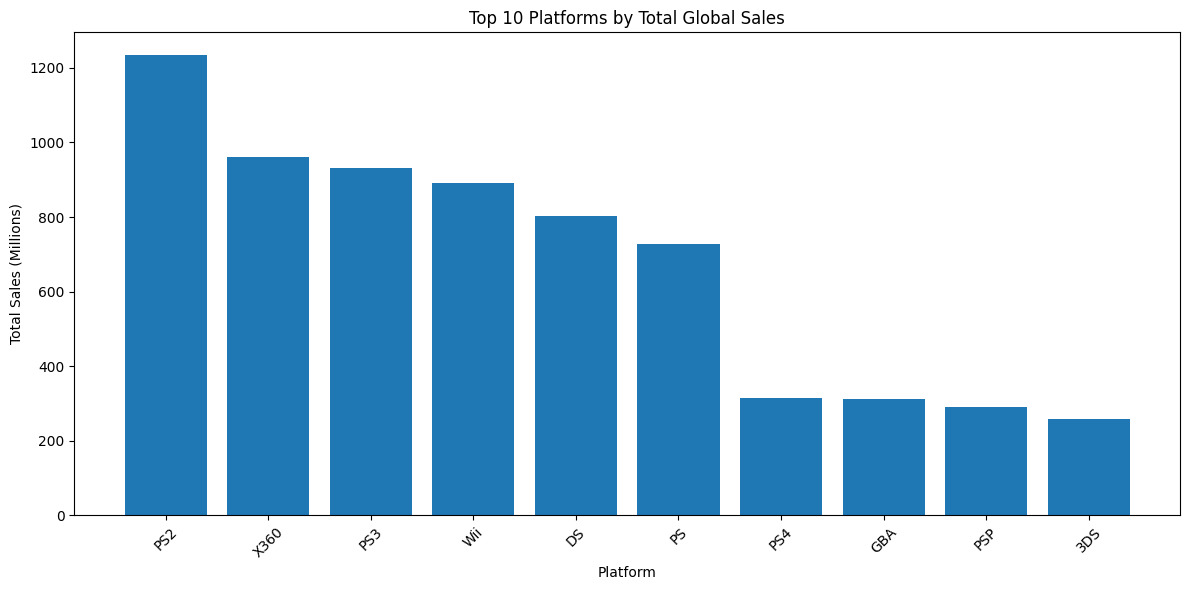

In [93]:
top_platforms = platform_comparison_df.nlargest(10, "Total Sales (M)")

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_platforms["Platform"], top_platforms["Total Sales (M)"])
plt.xlabel("Platform")
plt.ylabel("Total Sales (Millions)")
plt.title("Top 10 Platforms by Total Global Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()# Visualize cross-regional comparison for top platforms

This highlights how legacy consoles like the PS2 and Xbox 360 dominated sales, while newer systems had yet to catch up by 2016.

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [94]:
def analyze_genre_performance(df):
    """
    Analyzes game sales performance by genre across different regions.
    
    Parameters:
    - df: DataFrame with columns ['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    
    Returns:
    - A DataFrame summarizing total sales by genre for each region and globally.
    """
    required_columns = ['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    if not all(col in df.columns for col in required_columns):
        raise ValueError("Missing one or more required columns in DataFrame.")
    
    # Add total global sales
    df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

    # Group by Genre and sum sales for each region
    genre_summary = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].sum()
    
    # Round for readability
    genre_summary = genre_summary.round(2)

    # Sort by Global Sales
    genre_summary.sort_values(by='global_sales', ascending=False, inplace=True)
    
    return genre_summary # Function to analyze genre performance by region

In [95]:
genre_summary = analyze_genre_performance(df)
print(genre_summary)

              na_sales  eu_sales  jp_sales  other_sales  global_sales
genre                                                                
Action          863.17    510.99    160.14       182.22       1716.52
Sports          671.20    371.33    134.93       132.21       1309.67
Shooter         584.83    314.52     38.68       103.33       1041.36
Role-Playing    330.04    188.24    353.39        59.41        931.08
Platform        444.44    199.39    130.71        51.01        825.55
Misc            399.57    210.60    107.02        73.10        790.29
Racing          356.86    234.49     56.63        75.51        723.49
Fighting        220.51     99.00     87.28        35.87        442.66
Simulation      180.40    113.35     63.64        30.57        387.96
Puzzle          121.13     49.78     56.68        12.30        239.89
Adventure       101.52     63.20     52.24        16.37        233.33
Strategy         67.75     44.79     49.30        10.73        172.57


### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [96]:
df.rename(columns={
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Genre': 'genre'
}, inplace=True)

# Compute global sales
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Group and summarize
genre_comparison_df = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].sum().round(2)
genre_comparison_df['Top_Region'] = genre_comparison_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].idxmax(axis=1)
genre_comparison_df.sort_values(by='global_sales', ascending=False, inplace=True)

# Display the table
print(genre_comparison_df)
# Create a comparative genre analysis

              na_sales  eu_sales  jp_sales  other_sales  global_sales  \
genre                                                                   
Action          863.17    510.99    160.14       182.22       1716.52   
Sports          671.20    371.33    134.93       132.21       1309.67   
Shooter         584.83    314.52     38.68       103.33       1041.36   
Role-Playing    330.04    188.24    353.39        59.41        931.08   
Platform        444.44    199.39    130.71        51.01        825.55   
Misc            399.57    210.60    107.02        73.10        790.29   
Racing          356.86    234.49     56.63        75.51        723.49   
Fighting        220.51     99.00     87.28        35.87        442.66   
Simulation      180.40    113.35     63.64        30.57        387.96   
Puzzle          121.13     49.78     56.68        12.30        239.89   
Adventure       101.52     63.20     52.24        16.37        233.33   
Strategy         67.75     44.79     49.30        1

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [97]:
def analyze_esrb_impact(df):
    """
    Analyzes the impact of ESRB ratings on video game sales.

    Parameters:
    - df: DataFrame with lowercase columns: ['rating', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']

    Returns:
    - DataFrame summarizing total and regional sales by ESRB rating, including top-performing region.
    """
    required_cols = ['rating', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    if not all(col in df.columns for col in required_cols):
        raise ValueError("Missing one or more required columns.")

    # Drop rows with missing ESRB ratings
    df_clean = df.dropna(subset=['rating'])

    # Calculate global sales
    df_clean['global_sales'] = (
        df_clean['na_sales'] +
        df_clean['eu_sales'] +
        df_clean['jp_sales'] +
        df_clean['other_sales']
    )

    # Group by rating
    rating_summary = df_clean.groupby('rating')[
        ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
    ].sum().round(2)

    # Sort by global sales
    rating_summary.sort_values(by='global_sales', ascending=False, inplace=True)

    # Add top-performing region per rating
    rating_summary['top_region'] = rating_summary[
        ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    ].idxmax(axis=1)

    return rating_summary
# Function to analyze ESRB rating impact

In [98]:
esrb_summary = analyze_esrb_impact(df)
print(esrb_summary)

         na_sales  eu_sales  jp_sales  other_sales  global_sales top_region
rating                                                                     
Unknown   1227.62    610.18    836.77       149.95       2824.52   na_sales
E         1274.24    703.87    197.96       231.54       2407.61   na_sales
T          747.60    421.79    150.70       152.99       1473.08   na_sales
M          742.89    480.00     63.58       176.06       1462.53   na_sales
E10+       345.50    183.35     40.20        71.93        640.98   na_sales
K-A          2.56      0.27      1.46         0.03          4.32   na_sales
AO           1.26      0.61      0.00         0.09          1.96   na_sales
EC           1.53      0.11      0.00         0.11          1.75   na_sales
RP           0.00      0.03      0.00         0.01          0.04   eu_sales


In [99]:
df.rename(columns={
    'Rating': 'rating',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales'
}, inplace=True)

# Drop rows with missing ESRB ratings
df_clean = df.dropna(subset=['rating'])

# Calculate global sales
df_clean['global_sales'] = (
    df_clean['na_sales'] + df_clean['eu_sales'] + df_clean['jp_sales'] + df_clean['other_sales']
)

# Group by rating
esrb_impact_by_region = df_clean.groupby('rating')[
    ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
].sum().round(2)

# Add top-performing region
esrb_impact_by_region['top_region'] = esrb_impact_by_region[
    ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
].idxmax(axis=1)

# Sort by global sales
esrb_impact_by_region.sort_values(by='global_sales', ascending=False, inplace=True)

# Show table
print(esrb_impact_by_region)# Analyze ESRB impact for each region

         na_sales  eu_sales  jp_sales  other_sales  global_sales top_region
rating                                                                     
Unknown   1227.62    610.18    836.77       149.95       2824.52   na_sales
E         1274.24    703.87    197.96       231.54       2407.61   na_sales
T          747.60    421.79    150.70       152.99       1473.08   na_sales
M          742.89    480.00     63.58       176.06       1462.53   na_sales
E10+       345.50    183.35     40.20        71.93        640.98   na_sales
K-A          2.56      0.27      1.46         0.03          4.32   na_sales
AO           1.26      0.61      0.00         0.09          1.96   na_sales
EC           1.53      0.11      0.00         0.11          1.75   na_sales
RP           0.00      0.03      0.00         0.01          0.04   eu_sales


# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


Null hypothesis (H₀): The mean user ratings for Xbox One and PC are equal.
Alternative hypothesis (H₁): The mean user ratings for Xbox One and PC are different.    

In [100]:
xone_ratings = relevant_years[(relevant_years['platform'] == 'XOne') & (relevant_years['user_score'].notna())]['user_score']
pc_ratings = relevant_years[(relevant_years['platform'] == 'PC') & (relevant_years['user_score'].notna())]['user_score']

# T-test for independent samples
alpha = 0.05
result = stats.ttest_ind(xone_ratings, pc_ratings, equal_var=False)

print("p-value:", result.pvalue)

if result.pvalue < alpha:
    print("Reject the null hypothesis — average ratings are different.")
else:
    print("Fail to reject the null hypothesis — no significant difference in average ratings.")


p-value: 0.9801634129117883
Fail to reject the null hypothesis — no significant difference in average ratings.


 users rate games similarly on both platforms.

Null hypothesis (H₀): The mean user ratings for Action and Sports games are equal.
Alternative hypothesis (H₁): The mean user ratings for Action and Sports games are different.

In [101]:
action_ratings = df[(df['genre'] == 'Action') & (df['user_score'].notna())]['user_score']
sports_ratings = df[(df['genre'] == 'Sports') & (df['user_score'].notna())]['user_score']

# T-test
alpha = 0.05
result = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

print("p-value:", result.pvalue)

if result.pvalue < alpha:
    print("Reject the null hypothesis — average ratings are significantly different.")
else:
    print("Fail to reject the null hypothesis — no significant difference in average ratings.")

p-value: 0.07370217419278526
Fail to reject the null hypothesis — no significant difference in average ratings.


 On average, users rate games in both genres similarly.

# Step 6. Write a general conclusion


This analysis examined global video game sales data from 2010 to 2016 in order to identify patterns and factors that influence commercial success across games, genres, and platforms.

The findings reveal that:
- **Top-selling titles** in 2016 were primarily associated with well-known franchises or global events, including *FIFA World Cup South Africa* and *Frozen: Olaf’s Quest*.
- The **Action**, **Sports**, and **Shooter** genres achieved the highest total global sales, indicating sustained consumer interest and market strength in these categories.
- In terms of **platform performance**, legacy consoles such as the **PlayStation 2 (PS2)**, **Xbox 360**, and **Nintendo Wii** accounted for the majority of cumulative sales, suggesting that console lifespan and market saturation significantly impact overall performance.

Additionally, platform lifecycle trends provided insight into the durations of growth, decline, and stability, which can support strategic decision-making for platform support and retirement.

These insights offer valuable guidance for forecasting future game sales, planning marketing campaigns, and allocating development resources. Understanding the historical performance of platforms and genres is essential for anticipating market dynamics and maximizing the commercial success of upcoming game releases.

is this the type of thing that is expected? it was suggested as a better approach